In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
#Holt Winter Model

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred):
  y_true,y_pred= np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100 

In [197]:
data= pd.read_csv("cleaned_data_csv.csv")

In [198]:
data.head()

,Continent,Location,Date,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New_deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
0,Asia,Afghanistan,2020-02-24,5,5,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
1,Asia,Afghanistan,2020-02-25,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
2,Asia,Afghanistan,2020-02-26,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
3,Asia,Afghanistan,2020-02-27,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
4,Asia,Afghanistan,2020-02-28,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83


In [199]:
def create_df(data,location):
    #Selecting the 7 key columns for country in dataset
    data=data[data['Location']==location].copy()
    data=data[['Date','Total_Cases','New_Cases',
         'Total_deaths','New_deaths',
         "people vaccinated per hundred", 'people_fully_vaccinated_per_hundred',
          'new cases per million']].copy()
    #Convert to datetime
    #asia_1.date = pd.to_datetime(asia_1['Date'])
    data['Date'] = pd.DatetimeIndex(data['Date'])
    return data

In [200]:
asia_1=create_df(data,'India')

In [201]:
asia_1=asia_1.loc[:,['Date',"new cases per million"]]
asia_1=asia_1.set_index('Date')

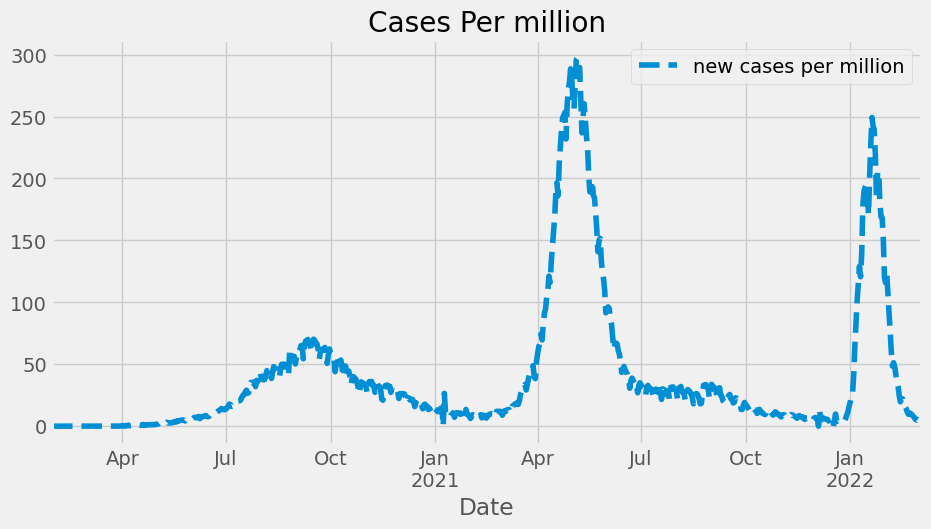

In [203]:
color_pal = sns.color_palette()
asia_1.plot(style='--',
               figsize=(10,5),
               ms=1,
               color=color_pal[0],
               title='Cases Per million')
plt.show()

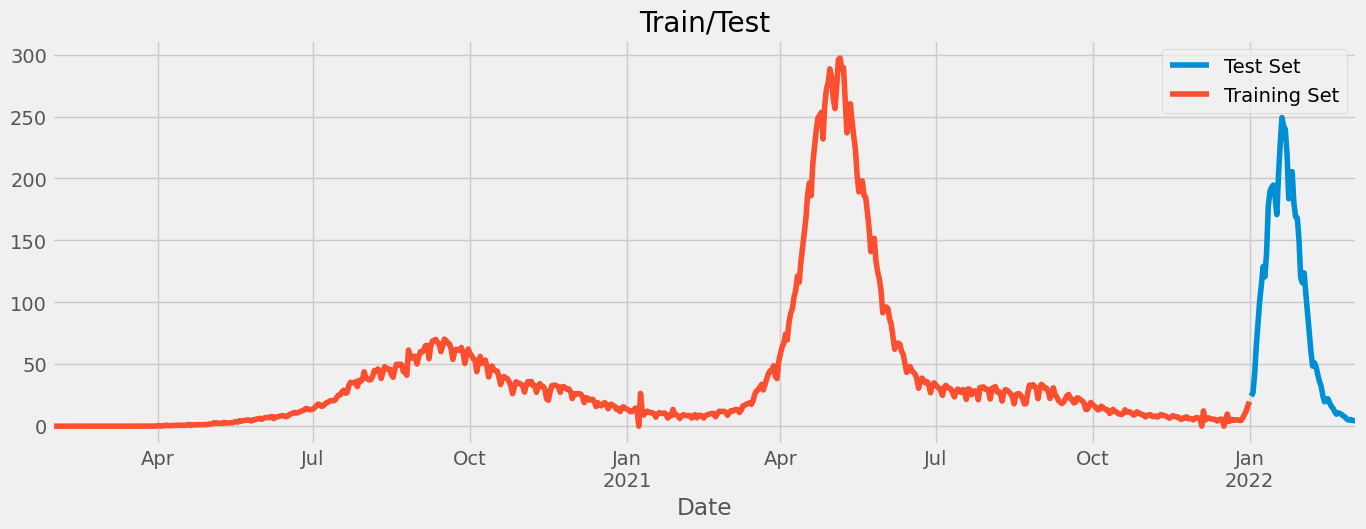

In [204]:
split_date='01-oct-2021'

asia_train1 = asia_1.loc[asia_1.index <=split_date].copy()
asia_test1 = asia_1.loc[asia_1.index >split_date].copy()

asia_test1 \
          .rename(columns={"new cases per million": 'Test Set'}) \
          .join(asia_train1.rename(columns={"new cases per million": 'Training Set'}),
                how='outer') \
          .plot(figsize=(15,5), title='Train/Test')
plt.show()

<bound method Axis.set_major_formatter of <matplotlib.axis.XAxis object at 0x7f9c5af33820>>

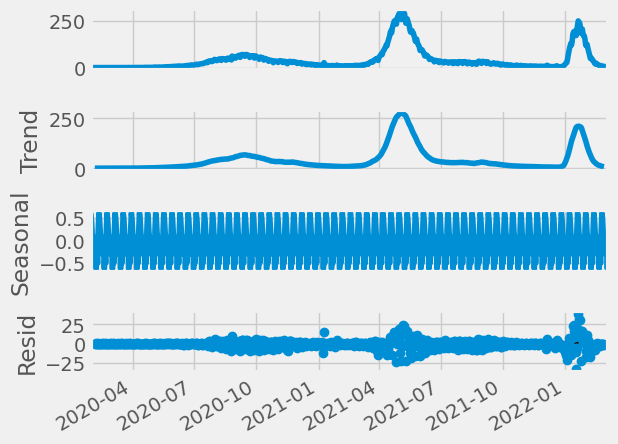

In [183]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(asia_1,period=12,model='additive')
result_add.plot()
plt.gcf().autofmt_xdate()
#date_format = mpld.DateFormatter('%y-%m')
plt.gca().xaxis.set_major_formatter


In [184]:
hwmodel=ExponentialSmoothing(asia_train1,trend='add', seasonal='add', seasonal_periods=4).fit()

In [186]:
asiatrain_pred1=hwmodel.forecast(365)  

In [187]:
asiatrain_pred1

2022-01-02     21.152651
2022-01-03     22.356567
2022-01-04     23.859829
2022-01-05     24.747153
2022-01-06     26.226537
                 ...    
2022-12-28    477.802382
2022-12-29    479.006298
2022-12-30    480.509560
2022-12-31    481.396884
2023-01-01    482.876268
Freq: D, Length: 365, dtype: float64

<Axes: xlabel='Date'>

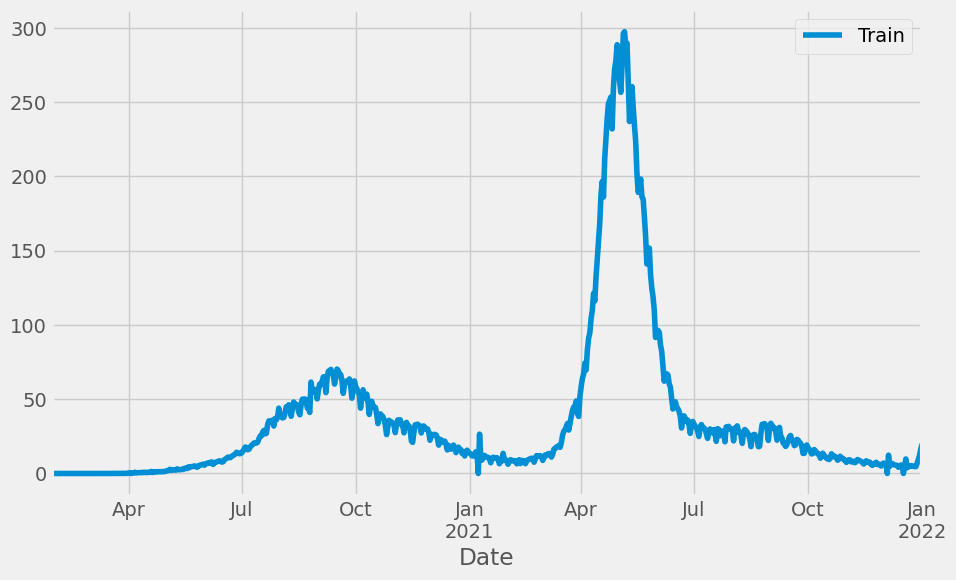

In [188]:
asia_train1["new cases per million"].plot(legend=True, label='Train', figsize=(10,6))

<Axes: >

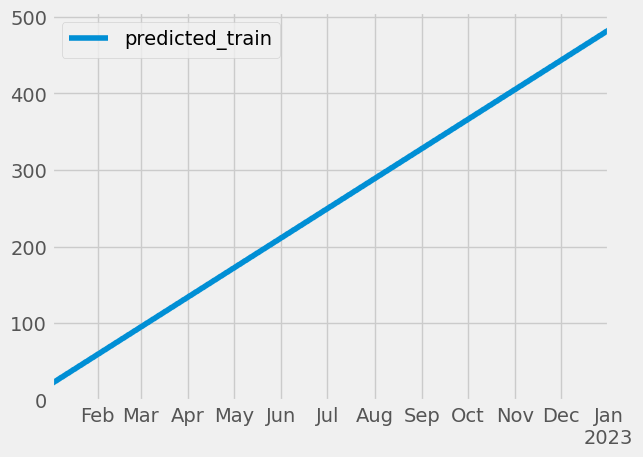

In [189]:
asiatrain_pred1.plot(legend=True, label='predicted_train')

In [190]:
final_modelasia1=ExponentialSmoothing(asia_1,trend='add', seasonal='add', seasonal_periods=4).fit()

In [191]:
fitted_modelasia1 = final_modelasia1.forecast(365)

In [192]:
pred=fitted_modelasia1

<Axes: xlabel='Date'>

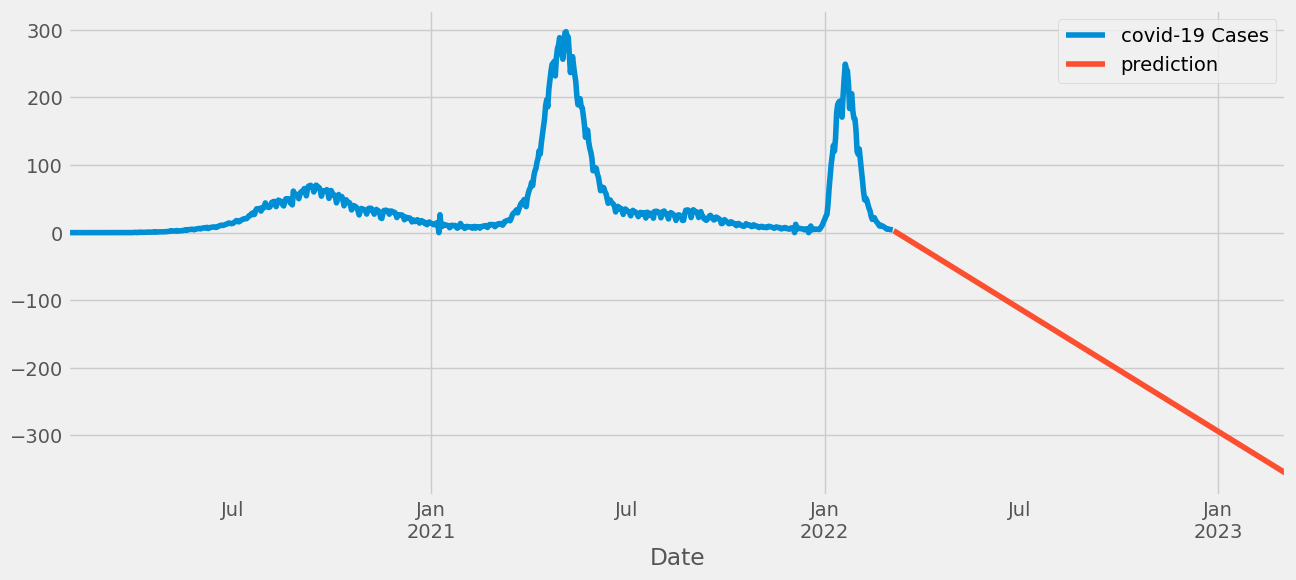

In [193]:
asia_1["new cases per million"].plot(legend=True, label='covid-19 Cases', figsize=(14,6))
pred.plot(legend=True, label='prediction')

In [208]:
asiatrain_pred1icted = hwmodel.fittedvalues
train_actual = asia_train1

test_predicted = hwmodel.predict(start=len(asia_train1), end=len(asia_train1)+len(asia_test1)-1)
test_actual = asia_test1


In [209]:
from sklearn.metrics import mean_squared_error
import math

rmse_train = math.sqrt(mean_squared_error(train_actual, asiatrain_pred1icted))
rmse_asia1 = math.sqrt(mean_squared_error(test_actual, test_predicted))

rmse_asia1

101.44767158132088

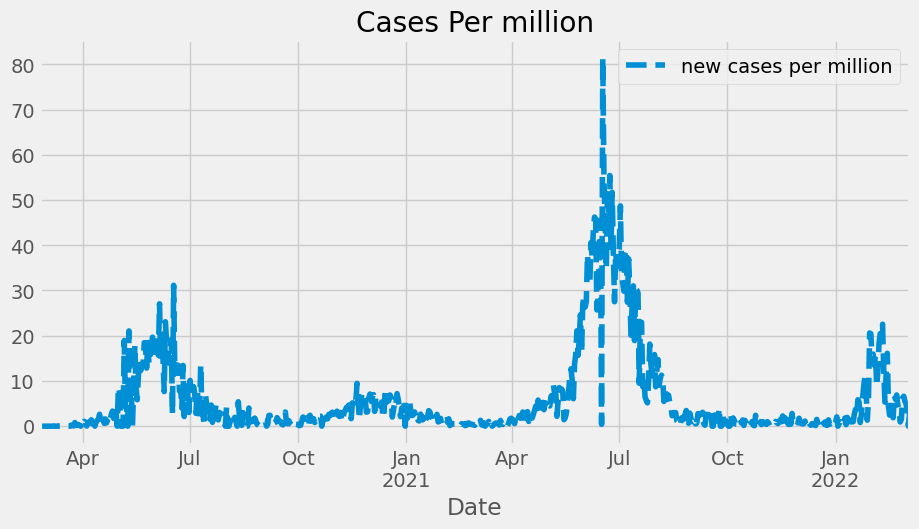

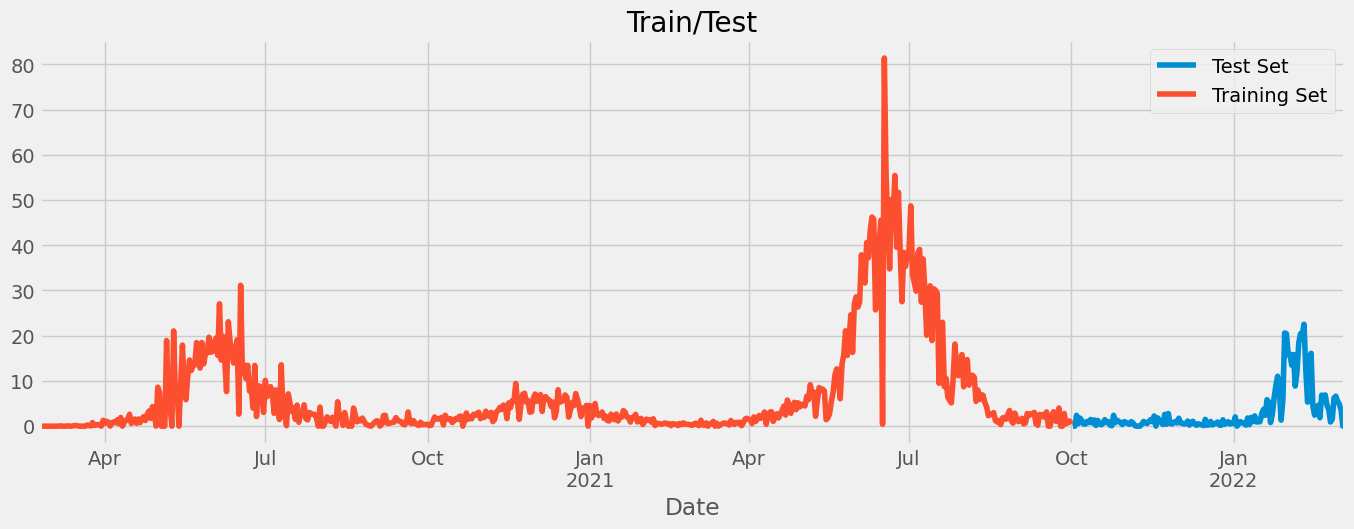

<bound method Axis.set_major_formatter of <matplotlib.axis.XAxis object at 0x7f9c54211eb0>>

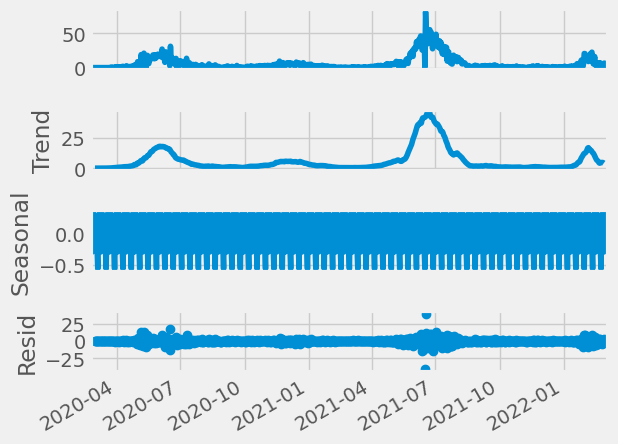

In [212]:
asia_2=create_df(data,'Afghanistan')

asia_2=asia_2.loc[:,['Date',"new cases per million"]]
asia_2=asia_2.set_index('Date')

color_pal = sns.color_palette()
asia_2.plot(style='--',
               figsize=(10,5),
               ms=1,
               color=color_pal[0],
               title='Cases Per million')
plt.show()


split_date='01-oct-2021'

asia_train2 = asia_2.loc[asia_2.index <=split_date].copy()
asia_test2 = asia_2.loc[asia_2.index >split_date].copy()

asia_test2 \
          .rename(columns={"new cases per million": 'Test Set'}) \
          .join(asia_train2.rename(columns={"new cases per million": 'Training Set'}),
                how='outer') \
          .plot(figsize=(15,5), title='Train/Test')
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(asia_2,period=12,model='additive')
result_add.plot()
plt.gcf().autofmt_xdate()
#date_format = mpld.DateFormatter('%y-%m')
plt.gca().xaxis.set_major_formatter




<Axes: xlabel='Date'>

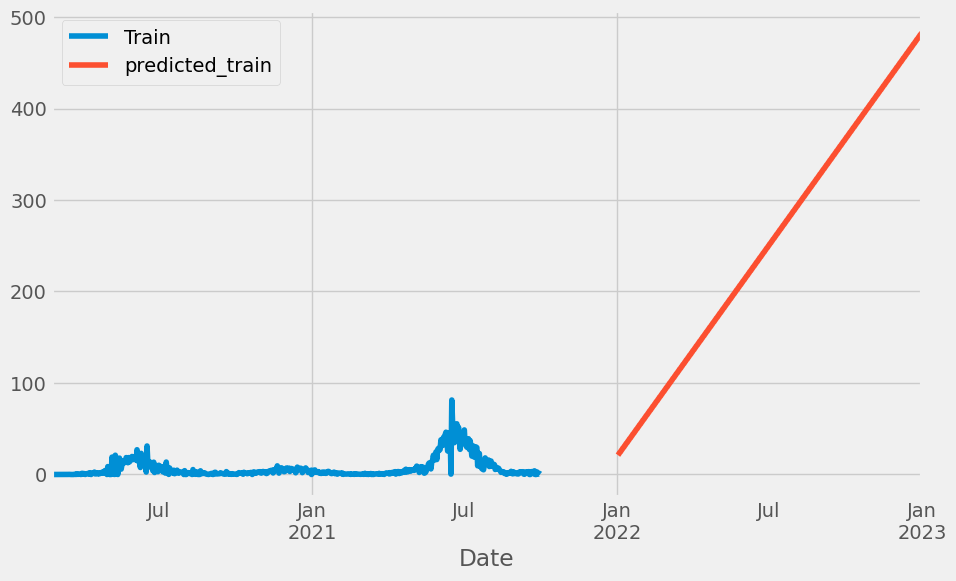

In [214]:
hwmodel=ExponentialSmoothing(asia_train1,trend='add', seasonal='add', seasonal_periods=4).fit()

asiatrain_pred2=hwmodel.forecast(365)  

asiatrain_pred2

asia_train2["new cases per million"].plot(legend=True, label='Train', figsize=(10,6))

asiatrain_pred2.plot(legend=True, label='predicted_train')

22.37288202194656

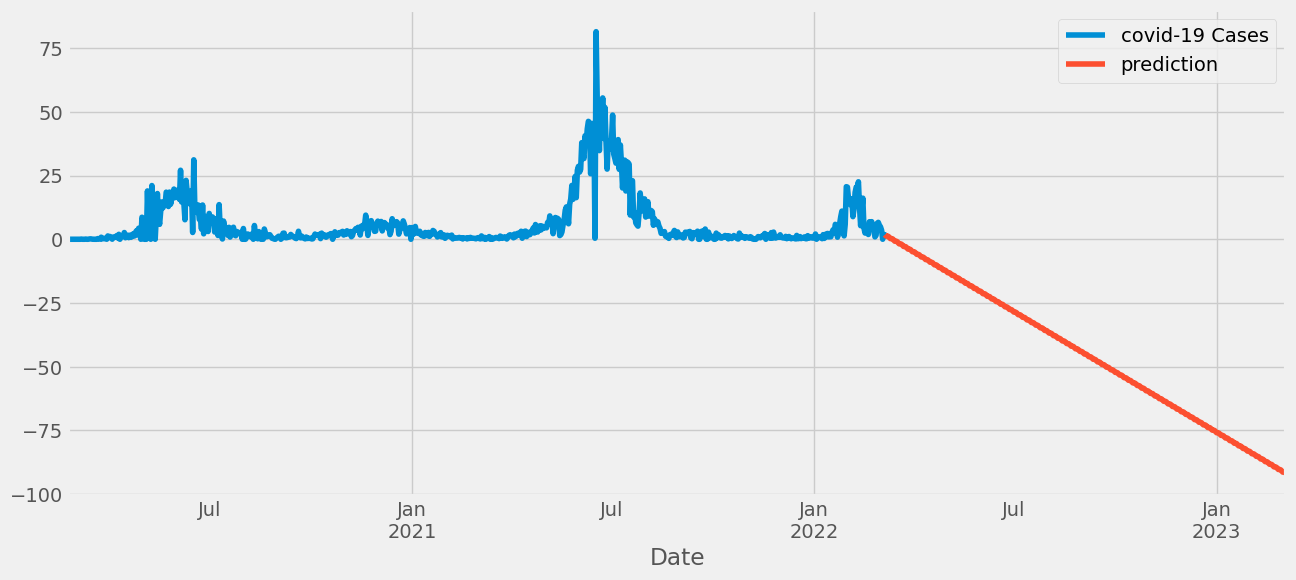

In [215]:
final_modelasia2=ExponentialSmoothing(asia_2,trend='add', seasonal='add', seasonal_periods=4).fit()

fitted_modelasia2 = final_modelasia2.forecast(365)

pred=fitted_modelasia2

asia_2["new cases per million"].plot(legend=True, label='covid-19 Cases', figsize=(14,6))
pred.plot(legend=True, label='prediction')

asiatrain_pred1icted = hwmodel.fittedvalues
train_actual = asia_train2

test_predicted = hwmodel.predict(start=len(asia_train2), end=len(asia_train2)+len(asia_test2)-1)
test_actual = asia_test2


rmse_asia2 = math.sqrt(mean_squared_error(test_actual, test_predicted))

rmse_asia2

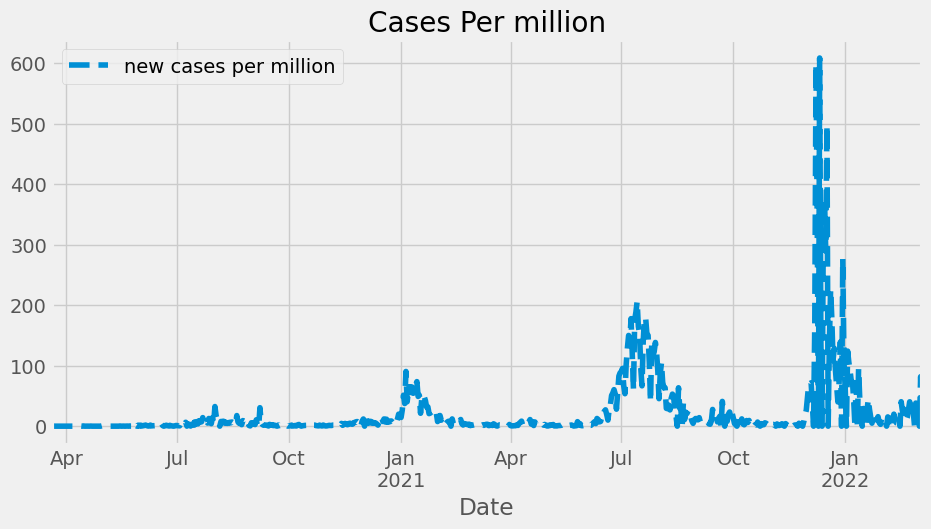

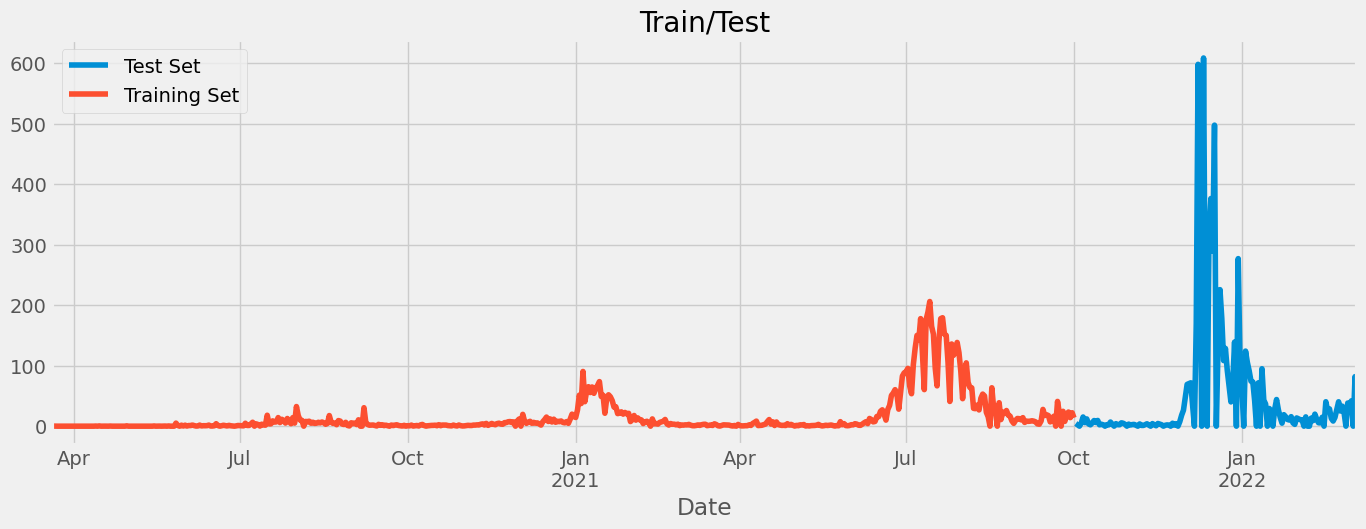

<bound method Axis.set_major_formatter of <matplotlib.axis.XAxis object at 0x7f9c544bdeb0>>

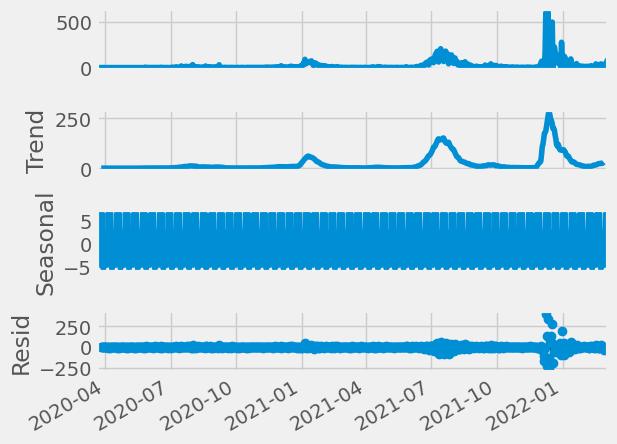

In [217]:
#AFRICA

africa_1=create_df(data,'Zimbabwe')

africa_1=africa_1.loc[:,['Date',"new cases per million"]]
africa_1=africa_1.set_index('Date')

color_pal = sns.color_palette()
africa_1.plot(style='--',
               figsize=(10,5),
               ms=1,
               color=color_pal[0],
               title='Cases Per million')
plt.show()


split_date='01-oct-2021'

africa_train1 = africa_1.loc[africa_1.index <=split_date].copy()
africa_test1 = africa_1.loc[africa_1.index >split_date].copy()

africa_test1 \
          .rename(columns={"new cases per million": 'Test Set'}) \
          .join(africa_train1.rename(columns={"new cases per million": 'Training Set'}),
                how='outer') \
          .plot(figsize=(15,5), title='Train/Test')
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(africa_1,period=12,model='additive')
result_add.plot()
plt.gcf().autofmt_xdate()
#date_format = mpld.DateFormatter('%y-%m')
plt.gca().xaxis.set_major_formatter



<Axes: xlabel='Date'>

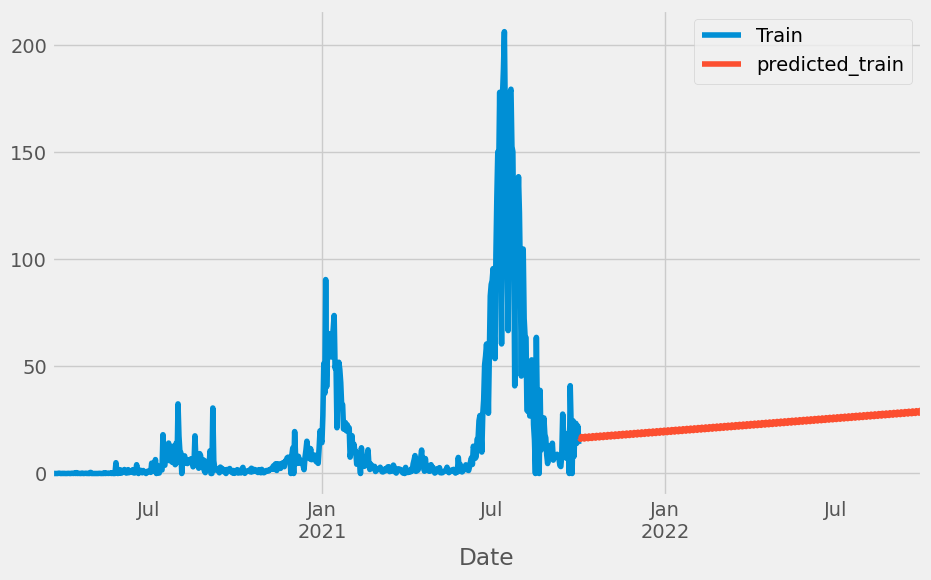

In [218]:
hwmodel=ExponentialSmoothing(africa_train1,trend='add', seasonal='add', seasonal_periods=4).fit()

africatrain_pred1=hwmodel.forecast(365)  

africatrain_pred1

africa_train1["new cases per million"].plot(legend=True, label='Train', figsize=(10,6))

africatrain_pred1.plot(legend=True, label='predicted_train')


102.39349518427717

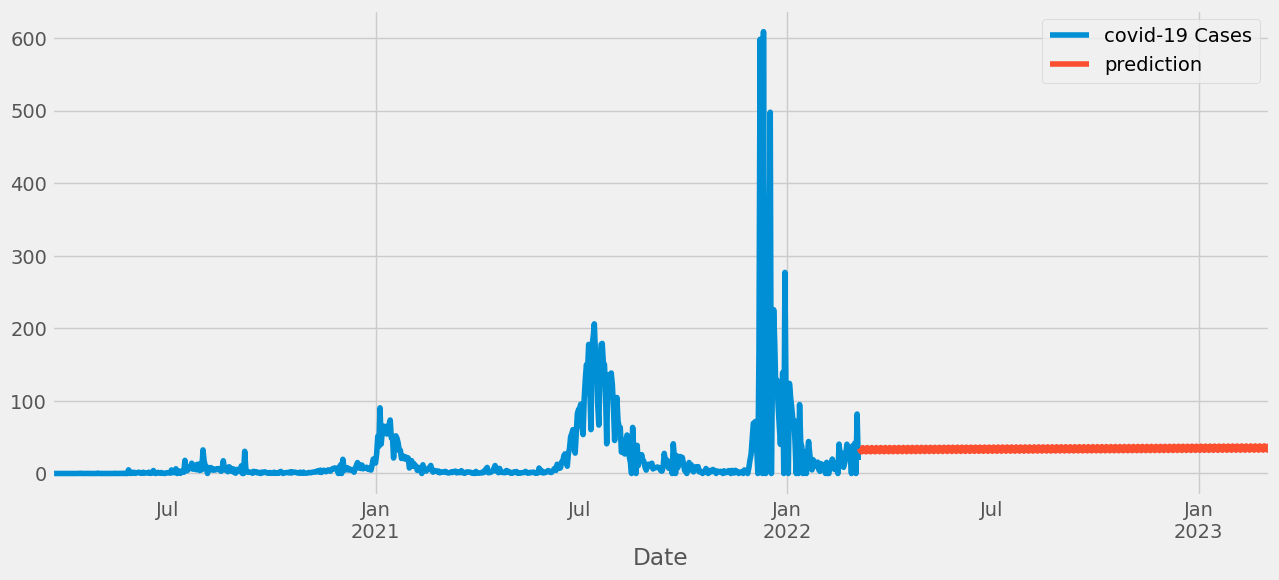

In [219]:
final_modelafrica1=ExponentialSmoothing(africa_1,trend='add', seasonal='add', seasonal_periods=4).fit()

fitted_modelafrica1 = final_modelafrica1.forecast(365)

pred=fitted_modelafrica1

africa_1["new cases per million"].plot(legend=True, label='covid-19 Cases', figsize=(14,6))
pred.plot(legend=True, label='prediction')

africatrain_pred1icted = hwmodel.fittedvalues
train_actual = africa_train1

test_predicted = hwmodel.predict(start=len(africa_train1), end=len(africa_train1)+len(africa_test1)-1)
test_actual = africa_test1


rmse_africa1 = math.sqrt(mean_squared_error(test_actual, test_predicted))

rmse_africa1


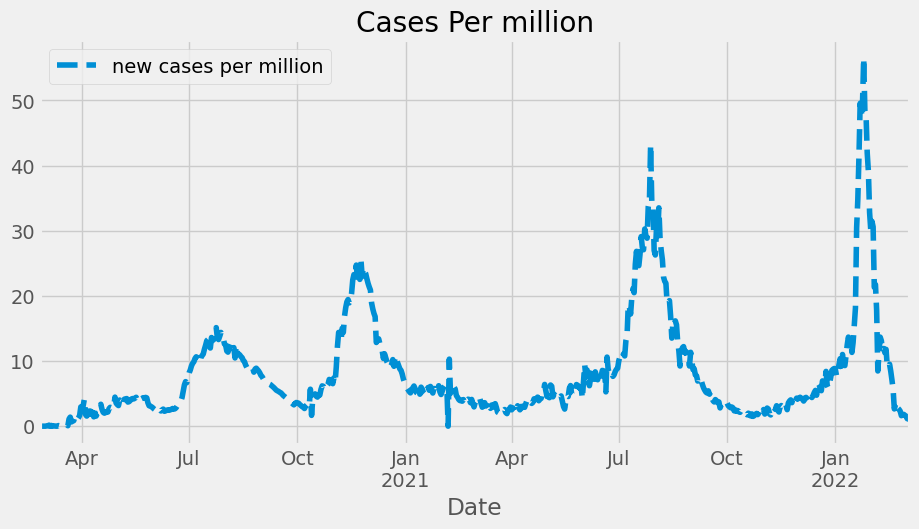

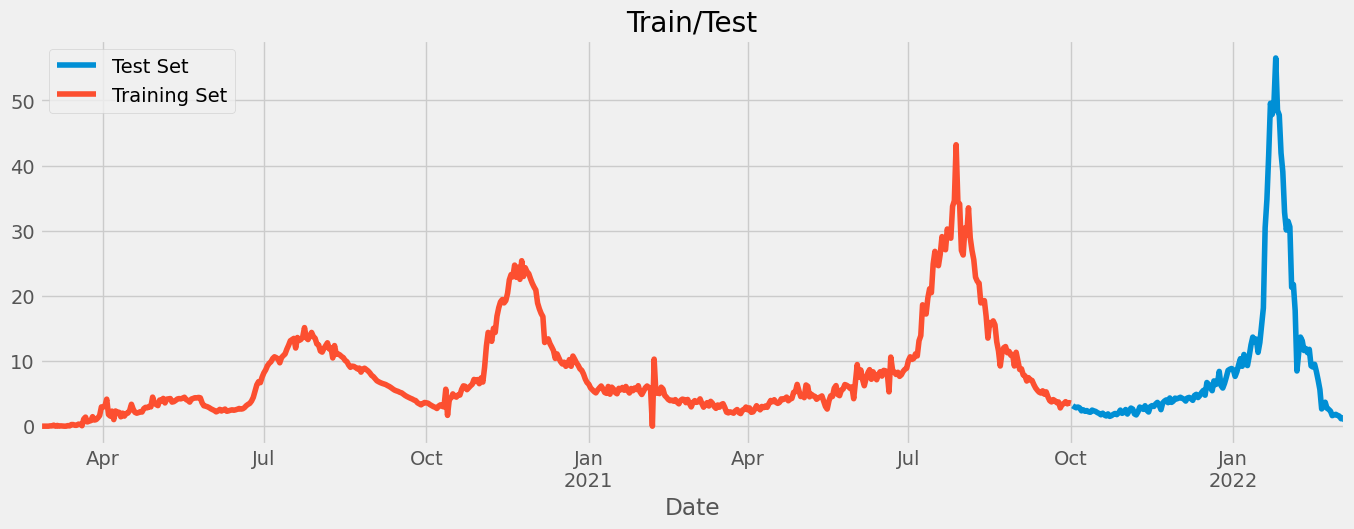

<bound method Axis.set_major_formatter of <matplotlib.axis.XAxis object at 0x7f9c5456fb20>>

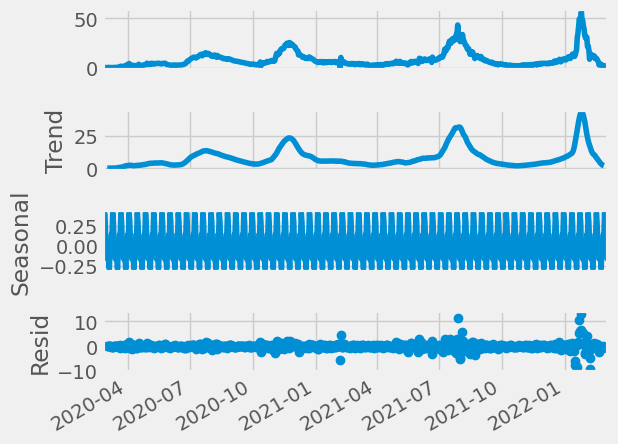

In [220]:
africa_2=create_df(data,'Algeria')

africa_2=africa_2.loc[:,['Date',"new cases per million"]]
africa_2=africa_2.set_index('Date')

color_pal = sns.color_palette()
africa_2.plot(style='--',
               figsize=(10,5),
               ms=1,
               color=color_pal[0],
               title='Cases Per million')
plt.show()


split_date='01-oct-2021'

africa_train2 = africa_2.loc[africa_2.index <=split_date].copy()
africa_test2 = africa_2.loc[africa_2.index >split_date].copy()

africa_test2 \
          .rename(columns={"new cases per million": 'Test Set'}) \
          .join(africa_train2.rename(columns={"new cases per million": 'Training Set'}),
                how='outer') \
          .plot(figsize=(15,5), title='Train/Test')
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(africa_2,period=12,model='additive')
result_add.plot()
plt.gcf().autofmt_xdate()
#date_format = mpld.DateFormatter('%y-%m')
plt.gca().xaxis.set_major_formatter


<Axes: xlabel='Date'>

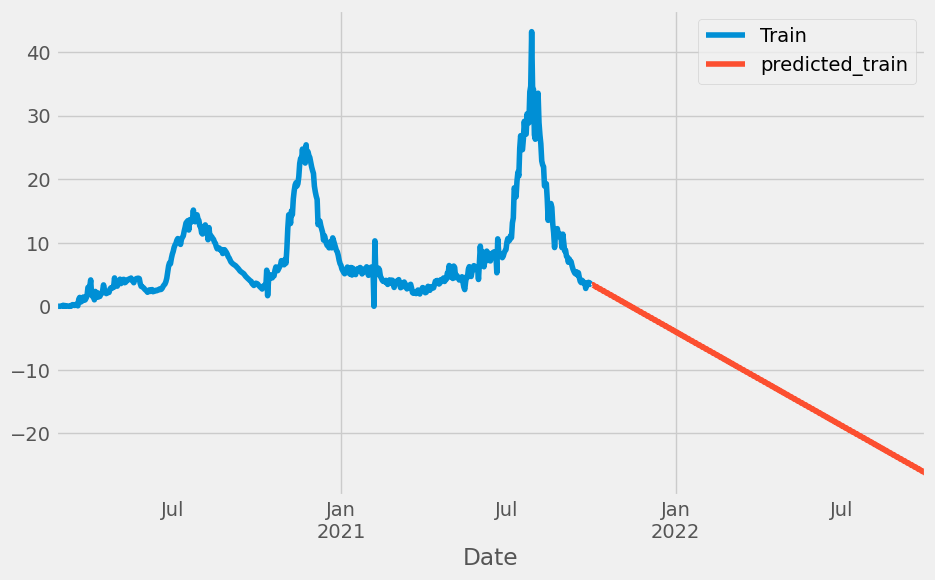

In [221]:
hwmodel=ExponentialSmoothing(africa_train2,trend='add', seasonal='add', seasonal_periods=4).fit()

africatrain_pred2=hwmodel.forecast(365)  

africatrain_pred2

africa_train2["new cases per million"].plot(legend=True, label='Train', figsize=(10,6))

africatrain_pred2.plot(legend=True, label='predicted_train')

17.910883789083666

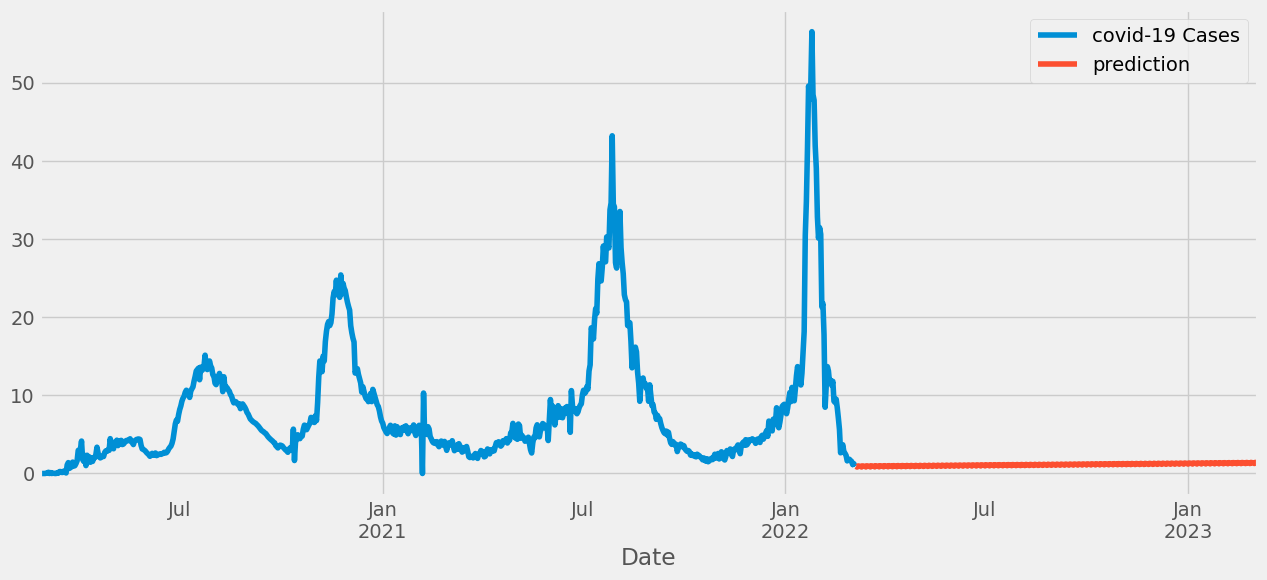

In [222]:
final_modelafrica2=ExponentialSmoothing(africa_2,trend='add', seasonal='add', seasonal_periods=4).fit()

fitted_modelafrica2 = final_modelafrica2.forecast(365)

pred=fitted_modelafrica2

africa_2["new cases per million"].plot(legend=True, label='covid-19 Cases', figsize=(14,6))
pred.plot(legend=True, label='prediction')

africatrain_pred1icted = hwmodel.fittedvalues
train_actual = africa_train2

test_predicted = hwmodel.predict(start=len(africa_train2), end=len(africa_train2)+len(africa_test2)-1)
test_actual = africa_test2


rmse_africa2 = math.sqrt(mean_squared_error(test_actual, test_predicted))

rmse_africa2

In [ ]:
#North Ameria

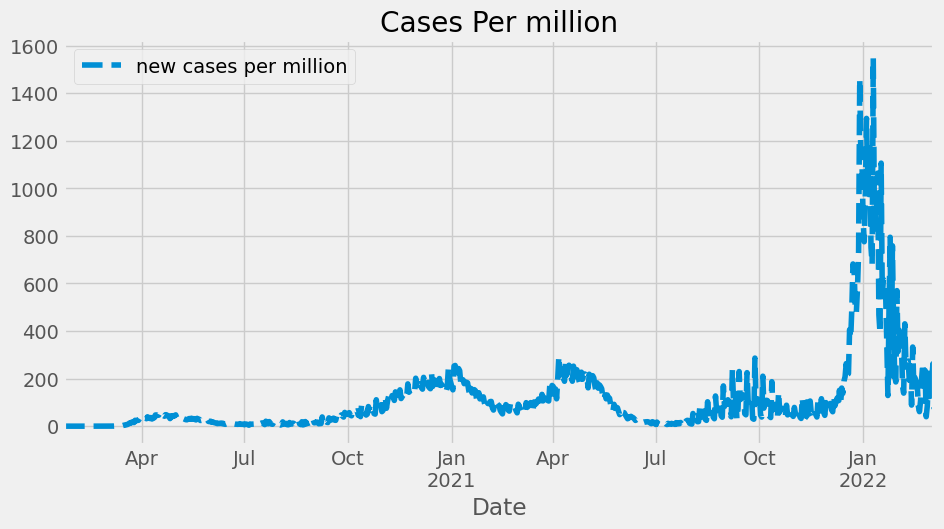

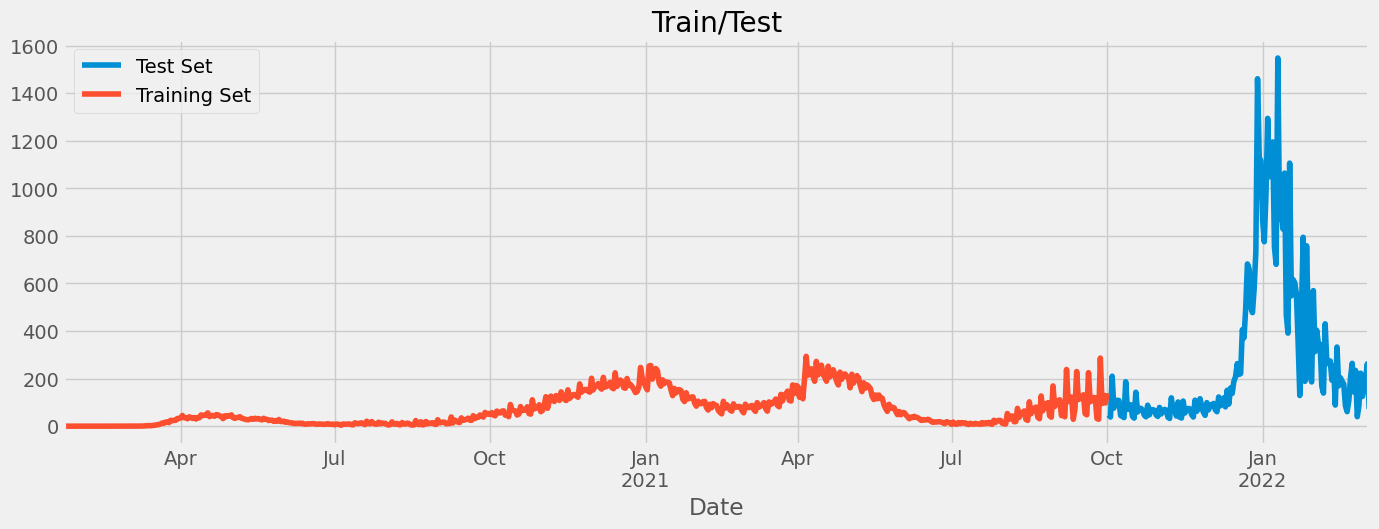

<bound method Axis.set_major_formatter of <matplotlib.axis.XAxis object at 0x7f9c53ab45b0>>

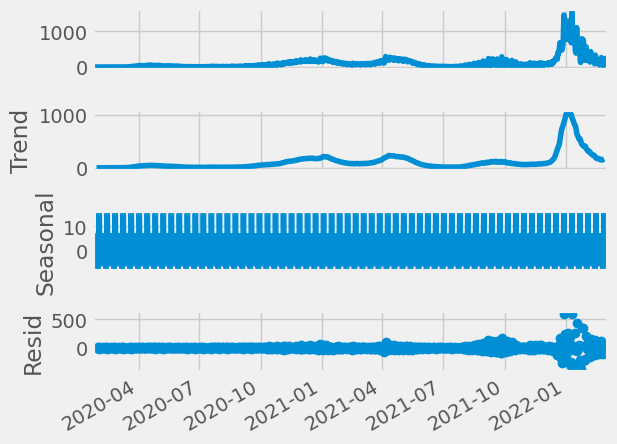

In [223]:
northamerica_1=create_df(data,'Canada')

northamerica_1=northamerica_1.loc[:,['Date',"new cases per million"]]
northamerica_1=northamerica_1.set_index('Date')

color_pal = sns.color_palette()
northamerica_1.plot(style='--',
               figsize=(10,5),
               ms=1,
               color=color_pal[0],
               title='Cases Per million')
plt.show()


split_date='01-oct-2021'

northamerica_train1 = northamerica_1.loc[northamerica_1.index <=split_date].copy()
northamerica_test1 = northamerica_1.loc[northamerica_1.index >split_date].copy()

northamerica_test1 \
          .rename(columns={"new cases per million": 'Test Set'}) \
          .join(northamerica_train1.rename(columns={"new cases per million": 'Training Set'}),
                how='outer') \
          .plot(figsize=(15,5), title='Train/Test')
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(northamerica_1,period=12,model='additive')
result_add.plot()
plt.gcf().autofmt_xdate()
#date_format = mpld.DateFormatter('%y-%m')
plt.gca().xaxis.set_major_formatter


<Axes: xlabel='Date'>

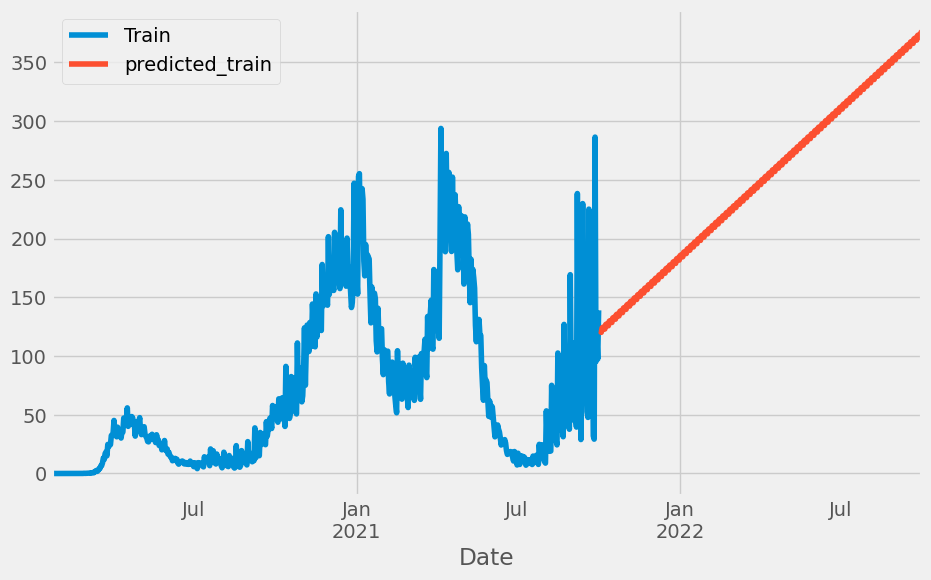

In [224]:
hwmodel=ExponentialSmoothing(northamerica_train1,trend='add', seasonal='add', seasonal_periods=4).fit()

northamericatrain_pred1=hwmodel.forecast(365)  

northamericatrain_pred1

northamerica_train1["new cases per million"].plot(legend=True, label='Train', figsize=(10,6))

northamericatrain_pred1.plot(legend=True, label='predicted_train')


339.2608182890566

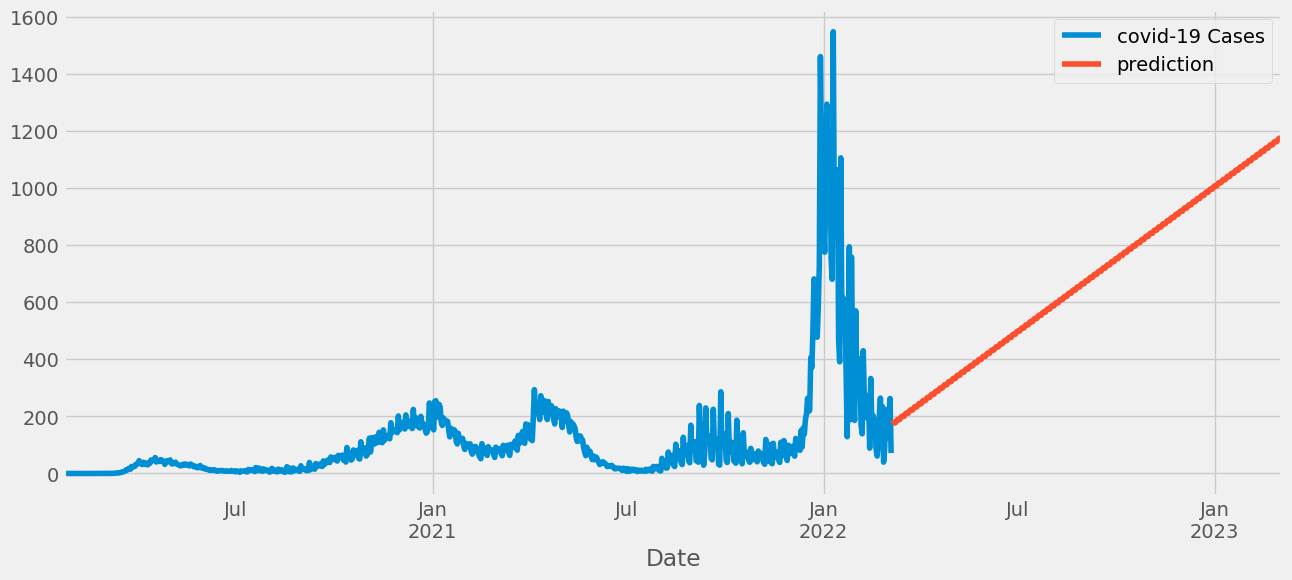

In [225]:
final_modelnorthamerica1=ExponentialSmoothing(northamerica_1,trend='add', seasonal='add', seasonal_periods=4).fit()

fitted_modelnorthamerica1 = final_modelnorthamerica1.forecast(365)

pred=fitted_modelnorthamerica1

northamerica_1["new cases per million"].plot(legend=True, label='covid-19 Cases', figsize=(14,6))
pred.plot(legend=True, label='prediction')

northamericatrain_pred1icted = hwmodel.fittedvalues
train_actual = northamerica_train1

test_predicted = hwmodel.predict(start=len(northamerica_train1), end=len(northamerica_train1)+len(northamerica_test1)-1)
test_actual = northamerica_test1


rmse_northamerica1 = math.sqrt(mean_squared_error(test_actual, test_predicted))

rmse_northamerica1


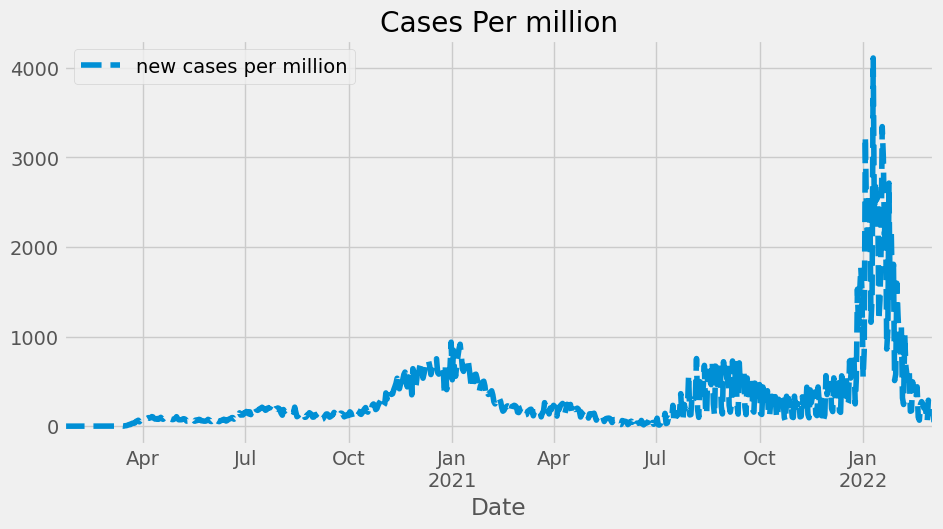

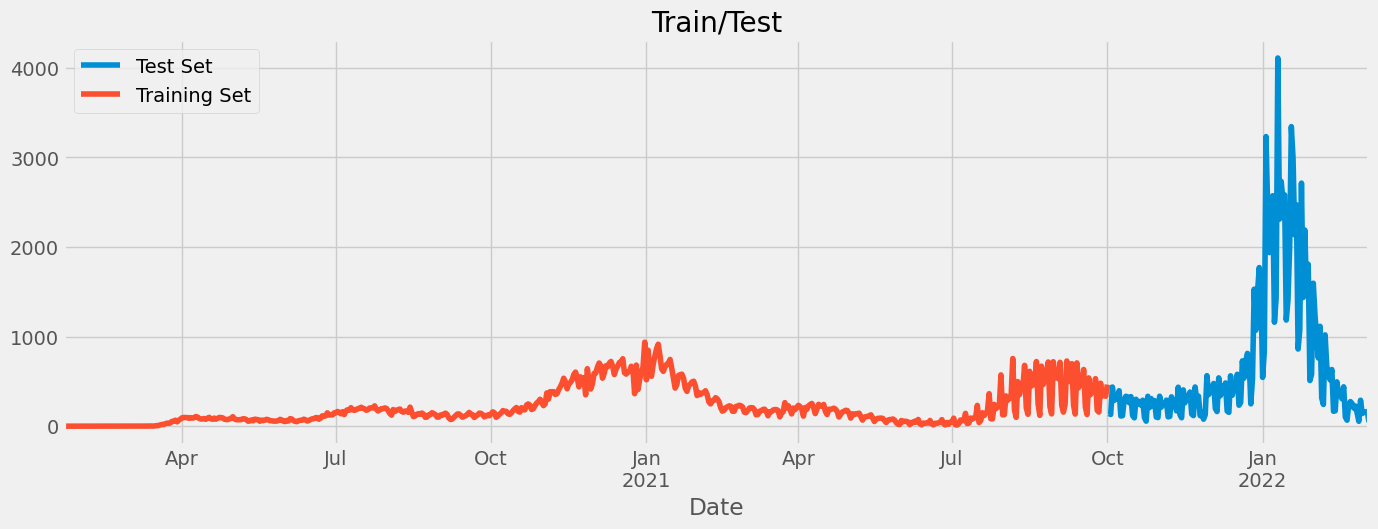

<bound method Axis.set_major_formatter of <matplotlib.axis.XAxis object at 0x7f9c530a5dc0>>

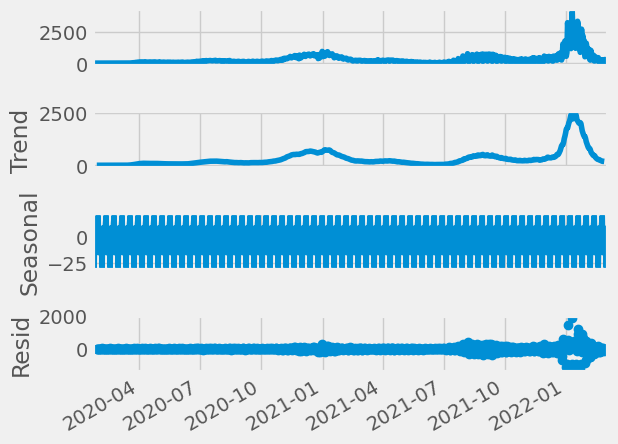

In [226]:
northamerica_2=create_df(data,"United States")

northamerica_2=northamerica_2.loc[:,['Date',"new cases per million"]]
northamerica_2=northamerica_2.set_index('Date')

color_pal = sns.color_palette()
northamerica_2.plot(style='--',
               figsize=(10,5),
               ms=1,
               color=color_pal[0],
               title='Cases Per million')
plt.show()


split_date='01-oct-2021'

northamerica_train2 = northamerica_2.loc[northamerica_2.index <=split_date].copy()
northamerica_test2 = northamerica_2.loc[northamerica_2.index >split_date].copy()

northamerica_test2 \
          .rename(columns={"new cases per million": 'Test Set'}) \
          .join(northamerica_train2.rename(columns={"new cases per million": 'Training Set'}),
                how='outer') \
          .plot(figsize=(15,5), title='Train/Test')
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(northamerica_2,period=12,model='additive')
result_add.plot()
plt.gcf().autofmt_xdate()
#date_format = mpld.DateFormatter('%y-%m')
plt.gca().xaxis.set_major_formatter


<Axes: xlabel='Date'>

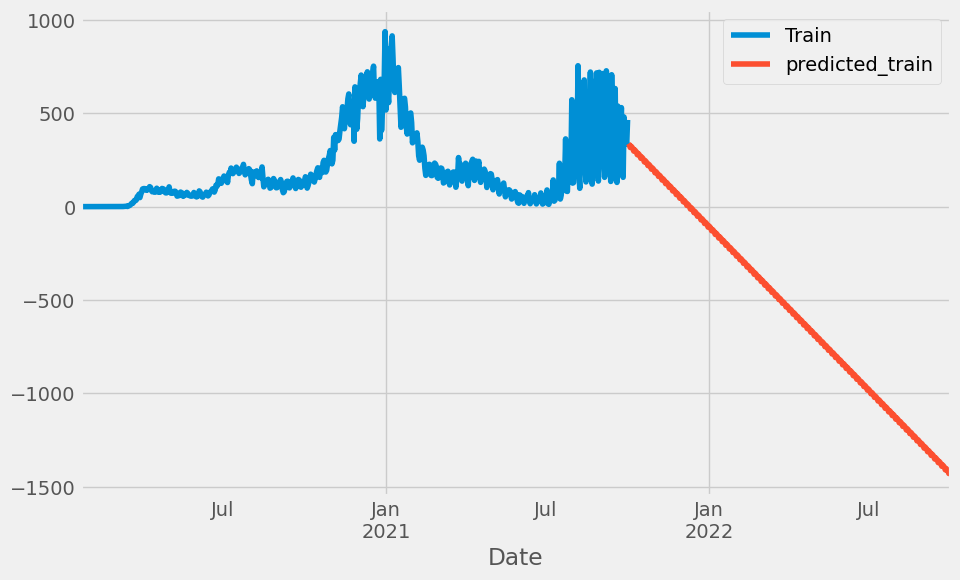

In [227]:
hwmodel=ExponentialSmoothing(northamerica_train2,trend='add', seasonal='add', seasonal_periods=4).fit()

northamericatrain_pred2=hwmodel.forecast(365)  

northamericatrain_pred2

northamerica_train2["new cases per million"].plot(legend=True, label='Train', figsize=(10,6))

northamericatrain_pred2.plot(legend=True, label='predicted_train')


1150.9851768412211

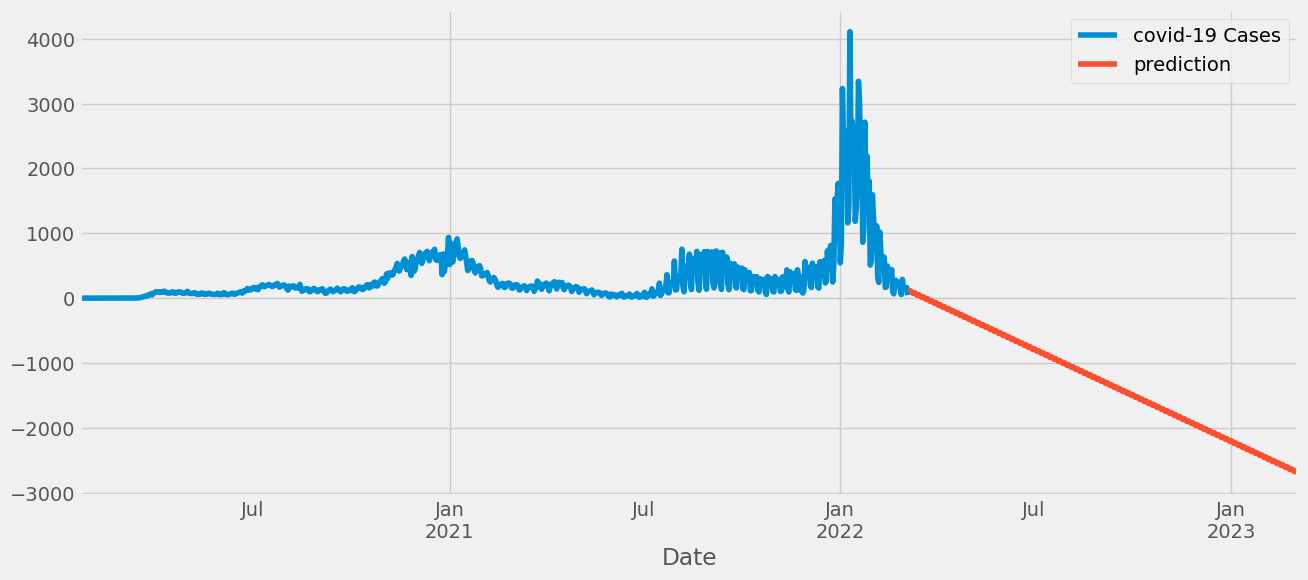

In [228]:
final_modelnorthamerica2=ExponentialSmoothing(northamerica_2,trend='add', seasonal='add', seasonal_periods=4).fit()

fitted_modelnorthamerica2 = final_modelnorthamerica2.forecast(365)

pred=fitted_modelnorthamerica2

northamerica_2["new cases per million"].plot(legend=True, label='covid-19 Cases', figsize=(14,6))
pred.plot(legend=True, label='prediction')

northamericatrain_pred1icted = hwmodel.fittedvalues
train_actual = northamerica_train2

test_predicted = hwmodel.predict(start=len(northamerica_train2), end=len(northamerica_train2)+len(northamerica_test2)-1)
test_actual = northamerica_test2


rmse_northamerica2 = math.sqrt(mean_squared_error(test_actual, test_predicted))

rmse_northamerica2


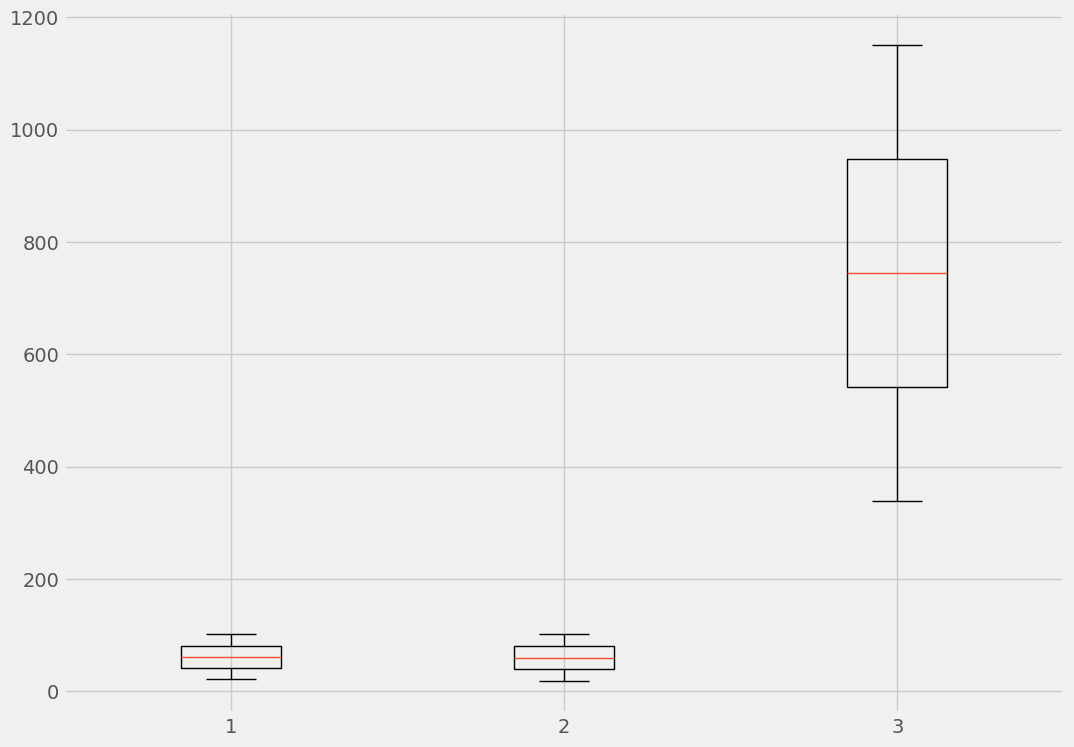

In [257]:
#RMSE

rmse_asia=(rmse_asia1,rmse_asia2)
rmse_africa=(rmse_africa1,rmse_africa2)
rmse_northamerica=(rmse_northamerica1,rmse_northamerica2)

rmse_all=[rmse_asia,rmse_africa,rmse_northamerica]


fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(rmse_all)
 
# show plot
plt.show()

#fig, axs = plt.subplots()
#axs.boxplot(rmse_all)
#axs.set_title('RMSE Values')
#axs.set_xlabel('Asia               Africa           North_America')
#axs.set_ylabel('RMSE')
#axs[1].boxplot(rmse_africa)
#axs[1].set_title('RMSE Values for Africa')
#axs[1].set_xlabel('Africa')
#axs[1].set_ylabel('RMSE')

# Show the plot
plt.show()


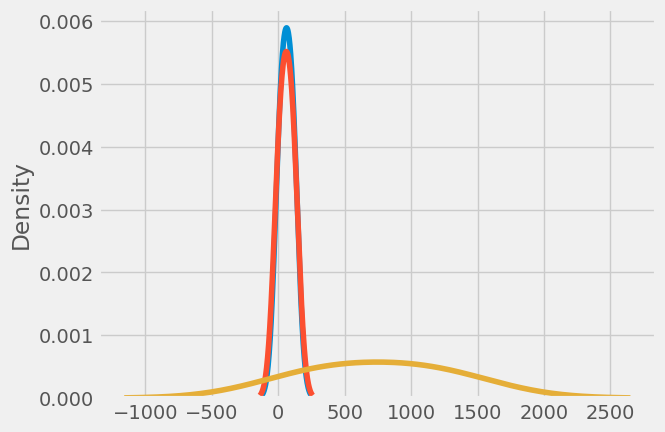

In [260]:
# Create a density distribution

sns.kdeplot(rmse_asia, label='RMSE 1')
sns.kdeplot(rmse_africa, label='RMSE 2')
sns.kdeplot(rmse_northamerica, label='RMSE 3')

# Show the plot
import matplotlib.pyplot as plt
plt.show()
